In [145]:
# Attribution: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
import numpy as np
import matplotlib.pyplot as plt
import cv2
#plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import tensorflow as tf

## Start by importing the weights obatined earlier: ##

In [146]:
model_cnn = keras.models.load_model('Letter_Classification_Weights')

In [147]:
print(model_cnn.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)        

## Next, turn on the camera and take a picture of the number ##

In [148]:
# cap = cv2.VideoCapture(0) # use this on raspberry pi
cap = cv2.VideoCapture(cv2.CAP_DSHOW) #use this on computer to remove black bars
 
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## We can display the image here, and check to make sure it looks good ##

(480, 640)

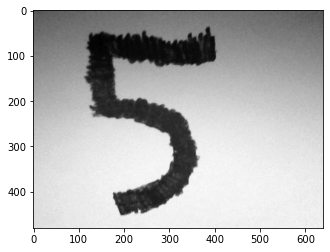

In [149]:
plt.imshow(gray, cmap = "gray")
gray.shape

## We will now resize it ##

(28, 28)

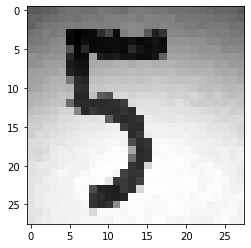

In [150]:
ROWS = 28
COLS = 28
img_resized = cv2.resize(gray, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)
plt.imshow(img_resized, cmap = "gray")
img_resized.shape

## Now, we will invert the image, so it matches our training data we used ##

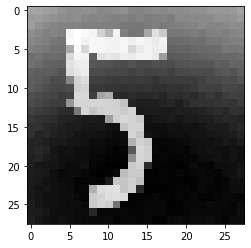

In [151]:
invimage = cv2.bitwise_not(img_resized)
plt.imshow(invimage, cmap = "gray")

## We will now filter out some of the background noise for an easier to process image

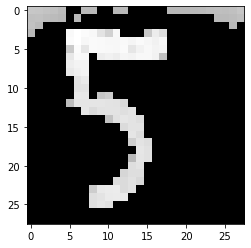

In [152]:
BWMaximage = invimage
for i in range(28):
    for j in range(28):
        if invimage[i,j] < 180:
            BWMaximage[i,j] = 0;
plt.imshow(BWMaximage, cmap = "gray")

## Now that the image is properly pre-processed, we can now use the CNN to predict what number it is ##

Number Prediction:
[5]
Confidence:
97.0 %


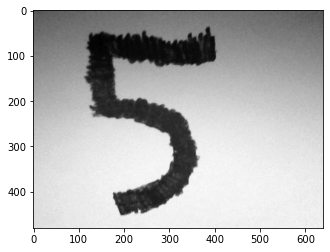

In [153]:
imagearray = BWMaximage.reshape(1,BWMaximage.shape[0],BWMaximage.shape[1],1)
nb_classes = 10
prediction = model_cnn.predict_classes(imagearray)
confidence = model_cnn.predict(imagearray)
plt.imshow(gray, cmap = "gray")
print("Number Prediction:")
print(prediction)
print("Confidence:")
confidence2 = confidence * 100
confidencemax = (np.amax(confidence2))
print (np.rint(confidencemax), "%")